# Prototyping2 - Image templating 

*Background*: Collection of 2d crystals is currently a very manual process. After identifying the desired sample on a high resolution microscope, the sample is transfered to a lower resolution scope for actual processing. Relocating the sample is currently a laborious and manual process.

*Purpose*: The purpose of this notebook is to investigate ways to locate the sample in question in an automated fashion **using opencv libraries**.

*Problem Statement*: Given two images collected on different microscopes, identify the location of the `template` image in the `target` image.



ref:
 - https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html
 - https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

# Import modules
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir)))
                
from common.io import load_image
from common.plots import plot_template_match

In [2]:
%load_ext autoreload
%autoreload 2

# Observations:
Manual observations of pair samples using GIMP reveal the following:
    
 - Although the template and target images are the same resolution, the template image is an almost exact match for the target when scaled down 5x.
 - Due to the virtually exact match between the target and template when rescaled, template matching (as opposed to feature matching) approaches may be ideal for identifying the location of the template within the target image.

In [3]:
examples_dir = "../static/examples"

In [4]:
# Image template algorithm is slow. downscaling will help with performance.
downscale=1
template = load_image(os.path.join(examples_dir, '5 H_Z.jpg'), downscale_factor=5*downscale)
target = load_image(os.path.join(examples_dir, '5 H.jpg'), downscale_factor=1*downscale)

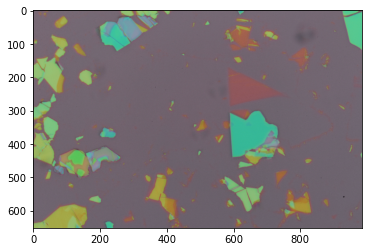

In [5]:
plt.imshow(template)

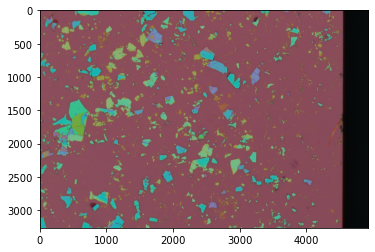

In [6]:
plt.imshow(target)

In [7]:
match = cv.matchTemplate(target, template, cv.TM_CCOEFF_NORMED)

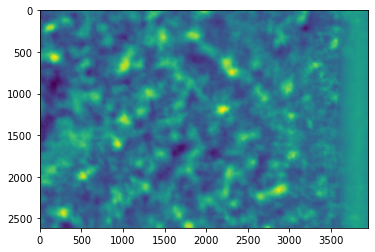

In [8]:
plt.imshow(match)

In [9]:
y, x = np.unravel_index(np.argmax(match), match.shape)

In [10]:
rect = plt.Rectangle((x, y), template.shape[1], template.shape[0], edgecolor='b', facecolor='none')


In [13]:
print(rect.get_x(), rect.get_y(), template.shape[1], template.shape[0])


2195 1190 985 652


array([<AxesSubplot:title={'center':'template'}>,
       <AxesSubplot:title={'center':'target'}>,
       <AxesSubplot:title={'center':'`match_template`\nresult'}>],
      dtype=object)

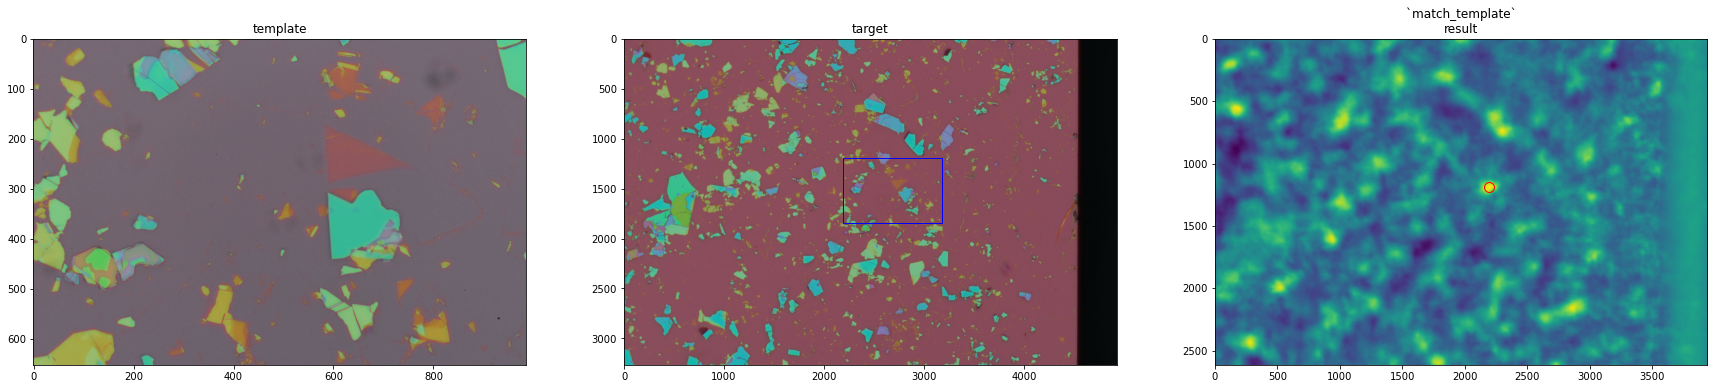

In [11]:
plot_template_match(template, target, match, rect)